### Imports

In [1]:
from scipy.optimize import minimize, NonlinearConstraint
import numpy as np
from numpy import sqrt
import matplotlib.pyplot as plt
import cvxpy as cp

In [2]:
# plot feasible region based on (non)linear constraints G, upper bounds b_ub
def compute_region(G, b_ub, x1, x2):
    region = np.zeros(shape=(len(x1), len(x2)))
        
    # check if constraint is satisfied at each point in the grid
    for j in range(len(x1)):
        for k in range(len(x2)):
            for i in range(len(G)):
                if G[i](x1[j, k], x2[j, k]) <= b_ub[i]:
                    region[j, k] += 1

    # if all constraints are satisfied, then the point is in the feasible region
    return (region == len(G)).astype(int)   

def plot_constraints(G, b_ub, x1, x2, zorder=0):
    for i in range(len(G)):  
        # plot constraint as contour lines
        cnt = plt.contour(x1, x2, G[i](x1, x2), levels=[b_ub[i]], colors='k', zorder=zorder)
        # label constraints
        plt.clabel(cnt, inline=True, fontsize=10, fmt={0: f'g{i+1}(x)'})   

### Problem 1

Contour plot

In [3]:
# objective function
def objective(x):
    return 4*x[0] + x[1]

# define range for input
r_min, r_max = 0.01, 2

# sample input range uniformly at 0.1 increments
x0axis = np.arange(r_min, r_max, 0.01)
x1axis = np.arange(r_min, r_max, 0.01)

# create a mesh from the axis
x1, x2 = np.meshgrid(x0axis, x1axis)
x_plt = np.stack((x1, x2), axis=0)

# compute targets
results = objective(x_plt)

In [4]:
# define functions
def s1(x1, x2):
    return 0.5*sqrt(2) * ((sqrt(3) / (3*x1)) + 1 / (x1 + 4*x2))

def s2(x1, x2):
    return 2*sqrt(2) / (x1 + 4*x2)

def s3(x1, x2):
    return 0.5*sqrt(2) * ((-sqrt(3) / (3*x1)) + 1 / (x1 + 4*x2))

# define constraints
def g1(x1, x2): return s1(x1, x2) - 1
def g2(x1, x2): return s2(x1, x2) - 1
def g3(x1, x2): return s3(x1, x2) - 1
def g4(x1, x2): return -s1(x1, x2) - 1
def g5(x1, x2): return -s2(x1, x2) - 1
def g6(x1, x2): return -s3(x1, x2) - 1

Solve the problem using scipy.optimize.minimize

In [5]:
# define constraints
cons = [NonlinearConstraint(lambda x: g1(x[0], x[1]), -np.inf, -0.00001),
        NonlinearConstraint(lambda x: g2(x[0], x[1]), -np.inf, -0.00001),
        NonlinearConstraint(lambda x: g3(x[0], x[1]), -np.inf, -0.00001),
        NonlinearConstraint(lambda x: g4(x[0], x[1]), -np.inf, -0.00001),
        NonlinearConstraint(lambda x: g5(x[0], x[1]), -np.inf, -0.00001),
        NonlinearConstraint(lambda x: g6(x[0], x[1]), -np.inf, -0.00001)]

# define bounds (x must be positive)
bnds = ((0.01, np.inf), (0.01, np.inf))

# initial guess
x0 = [2.0, 2.0]

# solve
res = minimize(objective, x0, method='SLSQP', bounds=bnds, constraints=cons)
print(res)

     fun: 2.7483757170944894
     jac: array([4., 1.])
 message: 'Optimization terminated successfully'
    nfev: 48
     nit: 15
    njev: 15
  status: 0
 success: True
       x: array([0.5443365 , 0.57102973])


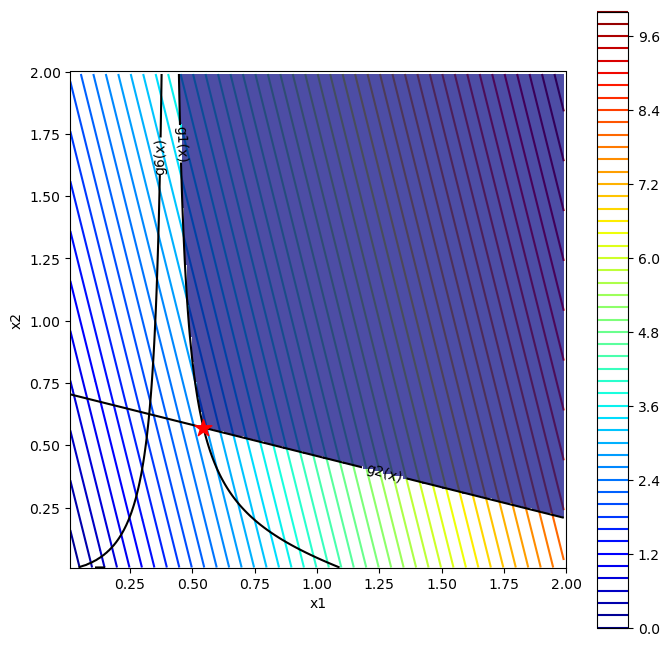

In [6]:
# create a contour plot with 50 levels and jet color scheme
plt.figure(figsize=(8, 8))
plt.contour(x1, x2, results, 50, alpha=1.0, cmap=plt.cm.jet)
plt.xlabel('x1')
plt.ylabel('x2')
plt.colorbar()

# get list of python colors
colors = list(plt.rcParams['axes.prop_cycle'].by_key()['color'])

# plot the constraints
ineq = [g1, g2, g3, g4, g5, g6]
ub = [0, 0, 0, 0, 0, 0]
plot_constraints(ineq, ub, x1, x2, zorder=10)

# plot the feasible region
region = compute_region(ineq, ub, x1, x2)
masked_region = np.ma.masked_where(region == 0, region)

plt.imshow(masked_region, extent=(x1.min(), x1.max(), x2.min(), x2.max()), 
           origin="lower", cmap="jet", alpha = 0.7, zorder=5, interpolation='none')

# plot the results
plt.scatter(res.x[0], res.x[1], color='red', zorder=11, label='x*', marker='*', s=160, linewidth=1)

# limit the plot to the range
plt.xlim(r_min, r_max)
plt.ylim(r_min, r_max)
plt.show()